<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

In [81]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Configuración de pandas
# --------------------------------------------

import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
# Importamos nuesto archivo cn las funciones de soporte
from src import soporte_nlp as snlp

In [83]:
df = pd.read_csv("datos/datos.csv", index_col=0)
df.head()


,reviewId,reviewDate,mainDepartment,subDepartment,productName,reviewTitle,reviewStar,reviewText,inconsistentStatus
65115,RXDM4W1ZL7L4L,"Reviewed in the United States on June 22, 2021",Sports and Outdoors,Outdoor Recreation,Doctor Developed Copper Wrist Brace / Carpal T...,One size does not fit all.,3.0,Nice lightweight brace but unfortunately was t...,1
56720,R2GINAKQJOSWEL,"Reviewed in the United States on August 27, 2021",Computers,Men's Clothing,Fruit of the Loom Men's Coolzone Boxer Briefs,They were ok but thats it,4.0,Boxers were ok. The color did start to fade pr...,0
26571,RD5R7T2JNP104,"Reviewed in the United States on May 21, 2021",Computers,Networking Products,"TP-Link AC750 WiFi Extender (RE220), Covers Up...",Good if you need a little extra.,4.0,Very easy to install. Worked right away but it...,0
40292,R3UEHJJ17E730C,"Reviewed in the United States on March 7, 2021",Home and Kitchen,Bath,"Gorilla Grip Luxury Chenille Bathroom Rug Mat,...",Color wrong!!!,1.0,The color is completely different than hunter ...,1
5884,R2257OUFMQ8P5C,"Reviewed in the United States on October 17, 2020",Beauty and Personal Care,Hair Care,WOW Apple Cider Vinegar Shampoo and Hair Condi...,I have 4A hair,2.0,"From reading the reviews, I was hoping that th...",0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 65115 to 43619
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewId            10000 non-null  object 
 1   reviewDate          10000 non-null  object 
 2   mainDepartment      10000 non-null  object 
 3   subDepartment       10000 non-null  object 
 4   productName         10000 non-null  object 
 5   reviewTitle         9995 non-null   object 
 6   reviewStar          10000 non-null  float64
 7   reviewText          9999 non-null   object 
 8   inconsistentStatus  10000 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 781.2+ KB


En primer lugar, filtramo spara quedarnos con las columnas que nos interesan

In [85]:
df = df[['mainDepartment','reviewText']]

In [86]:
df.head()

,mainDepartment,reviewText
65115,Sports and Outdoors,Nice lightweight brace but unfortunately was t...
56720,Computers,Boxers were ok. The color did start to fade pr...
26571,Computers,Very easy to install. Worked right away but it...
40292,Home and Kitchen,The color is completely different than hunter ...
5884,Beauty and Personal Care,"From reading the reviews, I was hoping that th..."


Eliminamos el unico nulo que hay en "reviewText".

In [87]:
df = df.dropna(subset=["reviewText"]).reset_index(drop = True)

In [88]:
df

,mainDepartment,reviewText
0,Sports and Outdoors,Nice lightweight brace but unfortunately was t...
1,Computers,Boxers were ok. The color did start to fade pr...
2,Computers,Very easy to install. Worked right away but it...
3,Home and Kitchen,The color is completely different than hunter ...
4,Beauty and Personal Care,"From reading the reviews, I was hoping that th..."
...,...,...
9994,Home and Kitchen,This scale is great for food prep. It is fast ...
9995,Sports and Outdoors,Comfortable but a little small. Rides down on...
9996,Sports and Outdoors,Really great volleyball for the water!! Only p...
9997,Computers,Good fit and comfortable to wear.


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mainDepartment  9999 non-null   object
 1   reviewText      9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB
None

Descripción del DataFrame:
               count unique        top  freq
mainDepartment  9999      5  Computers  3071
reviewText      9999   9928       Nice     7

Distribución de clases en la columna 'mainDepartment':
mainDepartment
Computers                   3071
Beauty and Personal Care    2103
Electronics                 1747
Home and Kitchen            1662
Sports and Outdoors         1416
Name: count, dtype: int64


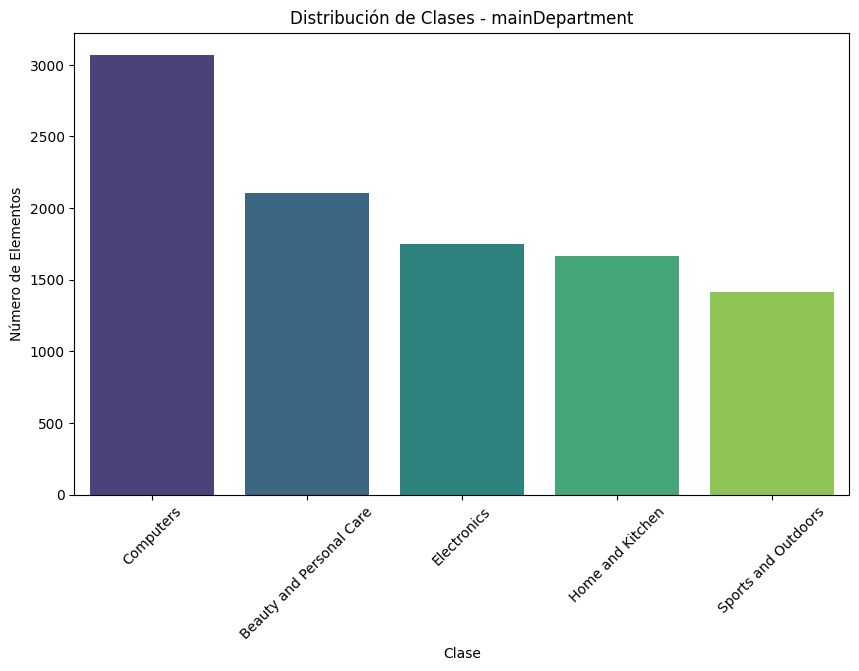

Limpiando el texto...
Texto limpiado y listo.
Generando nubes de palabras...


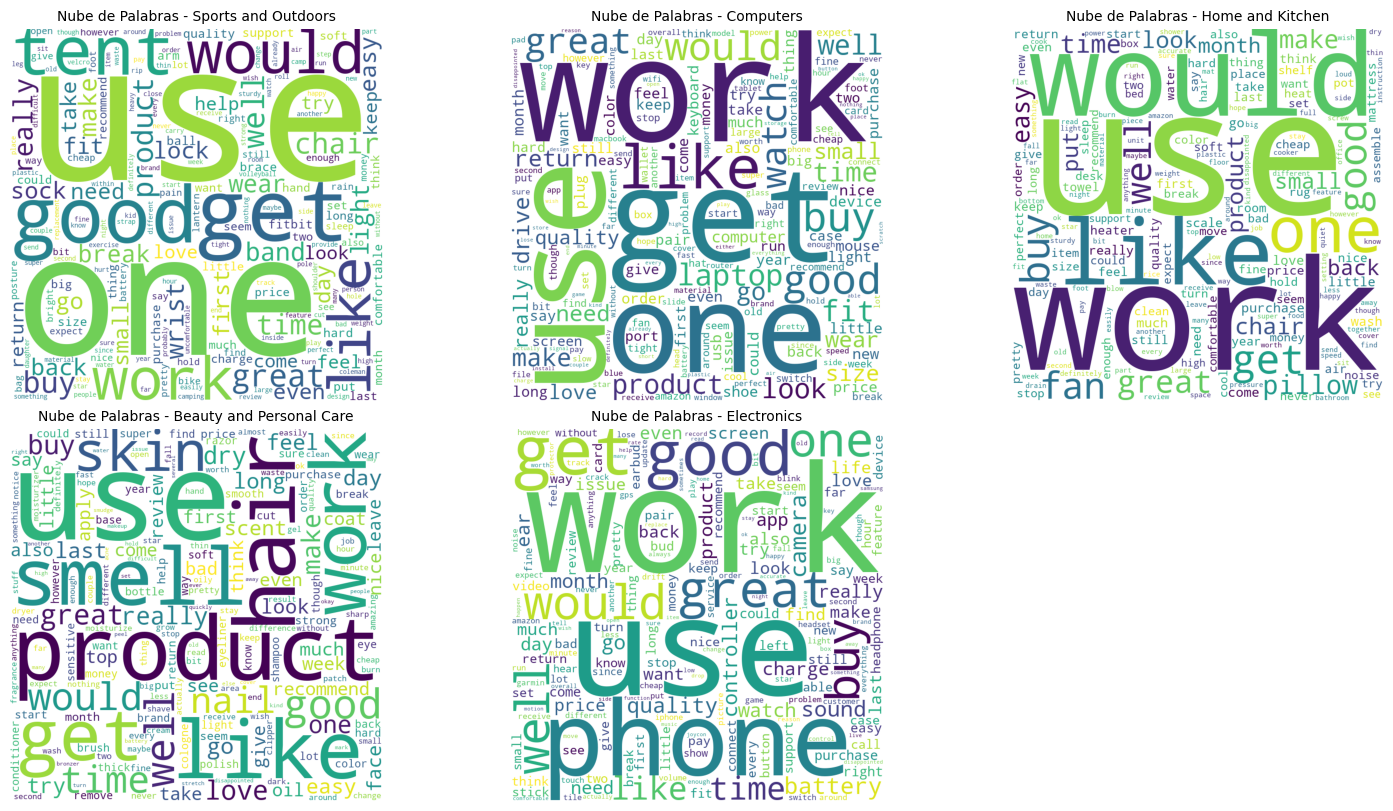

,mainDepartment,reviewText,cleaned_text
0,Sports and Outdoors,Nice lightweight brace but unfortunately was t...,nice lightweight brace unfortunately large wri...
1,Computers,Boxers were ok. The color did start to fade pr...,boxer ok color start fade pretty quickly becom...
2,Computers,Very easy to install. Worked right away but it...,easy install work right away go far expectedit...
3,Home and Kitchen,The color is completely different than hunter ...,color completely different hunter green andor ...
4,Beauty and Personal Care,"From reading the reviews, I was hoping that th...",read review hope shampoo conditioner would ext...


In [89]:
# Instanciar la clase con las columnas relevantes
exploracion = snlp.ExploracionText(dataframe=df, text_column='reviewText', label_column='mainDepartment', language="english")

# Explorar los datos
exploracion.explorar_datos()

# Limpiar los textos
exploracion.limpiar_textos("cleaned_text")

# Generar nubes de palabras
exploracion.generar_wordclouds()

# Obtener el DataFrame limpio
df_limpio = exploracion.obtener_dataframe_limpio()

# Ver las primeras filas del DataFrame limpio
df_limpio.head()